# Examination of Federal Reserve Meeting Minutes


#### *Keywords- Unsupervised learning, Topic-modeling, Text-analysis,Latent Dirichlet Allocation(LDA), Latent semantic analysis(LSA), Natural Language Processing( NLP)*

## Team:
    1. Harish Gandhi Ramachandran - Master's in computer science
    2. Dan De-Rose Jr - Master's in Fiance

## Objective:
   1. **Understand the relative proportions of concepts through time -  using Latent Dirichlet Allocation (LDA)**. 
   2. **Determine the influence of different policymakers on the minutes of meeting data - using Latent Semantic Analysis (LSA) **.

 Install all these packages before running this R script

## STEP 1 : Install requirements

In [1]:
#Install and load library
# update.packages(ask = FALSE)
# install.packages("NLP", dependencies=TRUE)
# install.packages("slam", dependencies=TRUE)
# install.packages("tm", dependencies=TRUE) # for text mining
# install.package("SnowballC", dependencies=TRUE) # for text stemming
# install.packages("wordcloud", dependencies=TRUE)# word-cloud generator
# install.packages("RColorBrewer", dependencies=TRUE) # color palettes
# install.packages('lda', dependencies=TRUE)
# install.packages('modeltools', dependencies=TRUE)
# install.packages('stats4', dependencies=TRUE)
# # install.packages('methods', dependencies=TRUE)
# install.packages('toppicmodels', dependencies=TRUE)
# install.packages('ggplot2', dependencies = TRUE)
# install.packages("NbClust", dependencies = TRUE)
# install.packages("factoextra", dependencies = TRUE)

# install.packages("lda", dependencies = TRUE)
# install.packages("MASS", dependencies = TRUE)
# install.packages("topicmodels", dependencies = TRUE)
# install.packages("lsa", dependencies = TRUE)
# install.packages("text2vec", dependencies = TRUE)
# install.packages("corrplot", dependencies = TRUE)

In [2]:
setwd("/home/harish/PycharmProjects/Topic-Modeling/")

In [3]:
library(NLP)
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(factoextra)
# library(cluster)
library(NbClust)
library(lsa)
# library(fpc)

#LDA

library(lda)
library(MASS)
library(topicmodels)

library(stringr)
library(text2vec)

library(corrplot)

Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘text2vec’

The following object is masked from ‘package:topicmodels’:

    perplexity

corrplot 0.84 loaded


In [4]:
##Set folder
# folder <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/stripped_text/"

In [5]:
## BUILDING CORPUS

folder <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/yearbasis/"
summary(folder)

   Length     Class      Mode 
        1 character character 

## STEP 2: Data preprocessing:

In [6]:
corpus_name <- Corpus(DirSource(folder, recursive=TRUE),readerControl = list(reader=readPlain))
num_docs <- length(corpus_name)
num_docs

[1] 25

In [7]:

print("dimension before:");
print(DocumentTermMatrix(corpus_name));

corpus_name<-tm_map(corpus_name,PlainTextDocument);
corpus_name<-tm_map(corpus_name, content_transformer(tolower));
corpus_name<-tm_map(corpus_name,removeWords,stopwords("english"));
corpus_name<-tm_map(corpus_name,removePunctuation);
corpus_name<-tm_map(corpus_name,removeNumbers);
corpus_name<-tm_map(corpus_name,stripWhitespace);

words_to_remove_in_article<-c("-","system","reserve","tthe","rnthe","participants", "continue", "open","committee", "federal", "also", "meeting", "FOMC", "\r","\t","Present", "\n", 'year') #irrevalant words
corpus_name<-tm_map(corpus_name, removeWords,words_to_remove_in_article); #removing irrevalant words in the article

corpus_name<-tm_map(corpus_name, stemDocument, language="english");

print("dimension after:");
print(DocumentTermMatrix(corpus_name));

[1] "dimension before:"
<<DocumentTermMatrix (documents: 25, terms: 10807)>>
Non-/sparse entries: 66603/203572
Sparsity           : 75%
Maximal term length: 26
Weighting          : term frequency (tf)
[1] "dimension after:"
<<DocumentTermMatrix (documents: 25, terms: 12529)>>
Non-/sparse entries: 50979/262246
Sparsity           : 84%
Maximal term length: 142
Weighting          : term frequency (tf)


### Creating Document Term Matrix

In [8]:
##build tdm/dtm matrix
tdm <- TermDocumentMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
tdm_matrix <- as.matrix(tdm)
##build a document/term matrix... words must have length 4
dtm <- DocumentTermMatrix(corpus_name,control=list(wordLengths=c(4,Inf),bounds = list(global = c(2,Inf))))
dtm_matrix <- as.matrix(dtm)
print(dim(dtm_matrix))
dtm

[1]   25 4752


<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)

In [9]:
dtms <- removeSparseTerms(dtm, 0.93)
dtms

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 41750/77050
Sparsity           : 65%
Maximal term length: 56
Weighting          : term frequency (tf)

In [10]:
m <- as.matrix(tdm)
v <- sort(rowSums(m), decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
# print(head(d, 30))
print(findFreqTerms(dtm,lowfreq = 2000))

 [1] "activ"    "balanc"   "bank"     "busi"     "chang"    "committe"
 [7] "condit"   "consum"   "continu"  "declin"   "econom"   "economi" 
[13] "expect"   "financi"  "forecast" "fund"     "growth"   "howev"   
[19] "increas"  "indic"    "inflat"   "labor"    "level"    "like"    
[25] "market"   "measur"   "moder"    "monetari" "month"    "note"    
[31] "number"   "outlook"  "pace"     "percent"  "period"   "polici"  
[37] "price"    "product"  "project"  "quarter"  "rang"     "rate"    
[43] "real"     "remain"   "rise"     "risk"     "spend"    "time"    
[49] "unemploy"


### Freq Visualization:

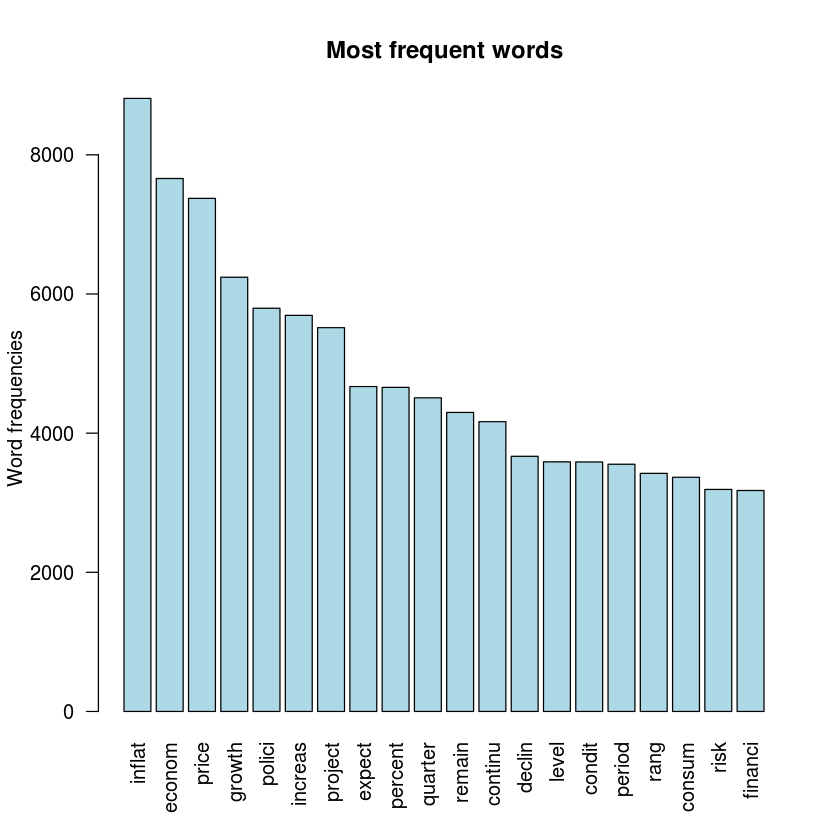

In [11]:
  #bar plot:
#   saveFileAs<- paste("wordFreq_barplot", i, sep="_")
#   setwd('/home/harish/PycharmProjects/Topic-Modeling/pictures')
#   png(filename = saveFileAs)
  barplot(d[1:20,]$freq, las = 2, names.arg = d[1:20,]$word,
          col ="lightblue", main ="Most frequent words",
          ylab = "Word frequencies")
#   dev.off()



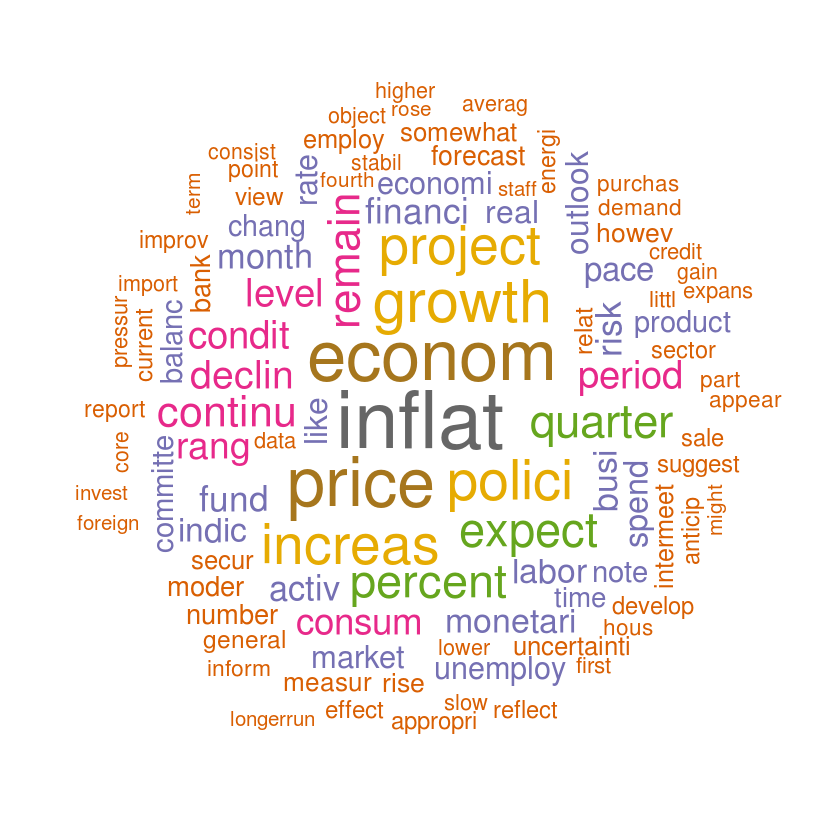

In [12]:
#   saveFileAs<- paste("wordcloud", i, sep="_")
#   png(filename = saveFileAs)
  wordcloud(names(v), v, max.words=100, rot.per=0.15, random.order=F,colors=brewer.pal(8, "Dark2"))
#   dev.off()

In [13]:
#Most frequent words:
head(d,10)

,word,freq
inflat,inflat,8811
econom,econom,7660
price,price,7374
growth,growth,6241
polici,polici,5795
increas,increas,5693
project,project,5516
expect,expect,4670
percent,percent,4658
quarter,quarter,4508


### Most Important word in the document corpus : TF-IDF

In [14]:
dtm_tfidf <- weightTfIdf(dtms) 
dtm_tfidf

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 29025/89775
Sparsity           : 76%
Maximal term length: 56
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

## STEP 3: Finding the Number of Topics to choose

### Clustering:

In [15]:
matDTM<-as.matrix(dtms)
tfidf<-weightTfIdf(dtms)
tfidf# how does the sparsity increases compared to dtms?
sparse<-removeSparseTerms(tfidf,0.995)
s<-as.matrix(sparse); dim(s)

<<DocumentTermMatrix (documents: 25, terms: 4752)>>
Non-/sparse entries: 29025/89775
Sparsity           : 76%
Maximal term length: 56
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

[1]   25 4243

##### Optimal clustmer number

In [16]:
#clustering
set.seed(123)
res<-NbClust(data=s, min.nc = 2, max.nc = 20, distance="euclidean", method="kmeans", index="silhouette")
f<-fviz_nbclust(s,kmeans,method="silhouette")
# res$Best.nc
#saving
# png('optimalCluster2.png')
# f
# dev.off()
# res


### *NOTE: There are two optimum which are closer, check out  cluster number = 6*

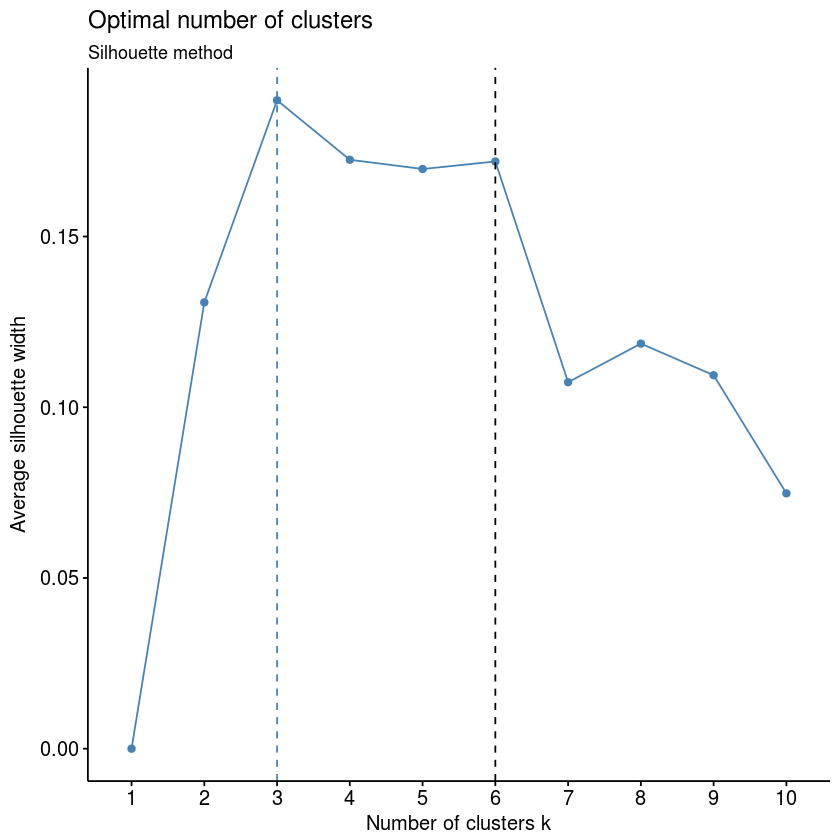

In [17]:
f+geom_vline(xintercept = 6, linetype = 2)+labs(subtitle = "Silhouette method")

# Kmeans

prcomp: 

Performs a principal components analysis on the given data matrix and returns the results as an object of class prcomp.

The calculation is done by a singular value decomposition of the (centered and possibly scaled) data matrix, not by using eigen on the covariance matrix. This is generally the preferred method for numerical accuracy.

In [18]:
#--------------------------------kmeans------------------------
set.seed(123)
# clus<-kmeans(s,3)

#wordcloud
m <- as.matrix(tfidf)
rownames(m) <- 1:nrow(m)

norm_eucl<- function(m)m/apply(m,MARGIN=1, FUN=function(x)sum(x^2)^.5)#Normalization first
m_norm<-norm_eucl(m)

cl_3<-kmeans(m_norm,3)
table(cl_3$cluster)
# png("kmeansCluster_3.png")
# plot(prcomp(m_norm)$x, col=cl_3$cl)
# dev.off()


 1  2  3 
 6 10  9 

In [19]:
cl_3$tot.withinss

[1] 13.72281

### Three clusters: *however we have topics more than 4?* Lets check with 6

In [20]:
#cluster numbers = 6
m_norm<-norm_eucl(m)
cl_6<-kmeans(m_norm,6)
table(cl_6$cluster)
png("kmeansCluster_6.png")
plot(prcomp(m_norm)$x, col=cl_6$cl)
dev.off()


1 2 3 4 5 6 
3 4 6 5 3 4 

png 
  2

### Which one to choose?

There are 3 SSE- based measures that we consider: total withinSSE, betweenSSE and total SSE.
The actual values of those measure are difficult to interpret. We will be looking at the ratio
withinSSE/totalSSE. Total withinSSE shows how coherent (tight) are the clusters. The betweenSSE
shows how well the clusters are separated. The total SSE is the sum. A good clustering has tight
clusters that are well separated. So, we would like ratio withinSSE/totalSSE to be small. As we
experiment with different representations, we should compare that ratio to see what representation
gives better clustering

In [21]:
SSE_3<-100-(cl_3$tot.withinss/cl_3$totss)*100
SSE_3
SSE_6<-100-(cl_6$tot.withinss/cl_6$totss)*100
SSE_6

[1] 30.74793

[1] 46.3386

In [22]:
# ## Singluar Value Decomposition: 

# SVD to decompose the matrix in the document in k concept and term in k concept space
# ##return top words by concept

# ##first create function to return top words; require dtms
# concept<-function(num){ 
#   sv<-sort.list((svd(dtms))$v[,num],decreasing = FALSE)
#   # print(sv)
#   # print(dtms$dimnames)
#   dm<-dtms$dimnames$Terms[head(sv,5)] 
#   return(dm)
# }
# ##how many words?
# num <- num_docs
# i <- 1:num
# val <- sapply(i, concept)
# val

# STEP 4: LDA
Identify the 4 concepts/topics for the document set

In [23]:
# #Set parameters for Gibbs sampling
# burnin = 4000
# iter = 2000
# thin = 500
# seed = list(2003,5,63,100001,765)
# nstart = 5
# best = TRUE

# #Number of topics
# k = 3

In [24]:
# write.table(val,file=paste("/home/harish/PycharmProjects/Topic-Modeling/val.csv"), append = T)
# ldaGibbs5@gamma

In [25]:

k = 4 #4 topics

    ldaGibbs_k <-LDA(dtms, k, method = "Gibbs")
    vector <- NULL
    for(i in 1:nrow(ldaGibbs_k@gamma)) {
      vector <- c(vector, ldaGibbs_k@gamma[i,])
    }


    Concepts <- rep(c("Concept 1","Concept 2","Concept 3","Concept 4"),times=num_docs)
#     TimeByDocs <- as.numeric(rep(c("1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004",
#                                    "2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"),each=k))
# TimeByDocs <- as.numeric(rep(1:num_docs,each=k))
TimeByDocs <- as.numeric(rep(1993:2017,each=k))
chartdata <- data.frame(Concepts,TimeByDocs,vector)
    myplot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()
    plotname <- paste(k,"png", sep=".");
    ggsave(filename=plotname, plot=myplot)


Saving 6.67 x 6.67 in image


png 
  2

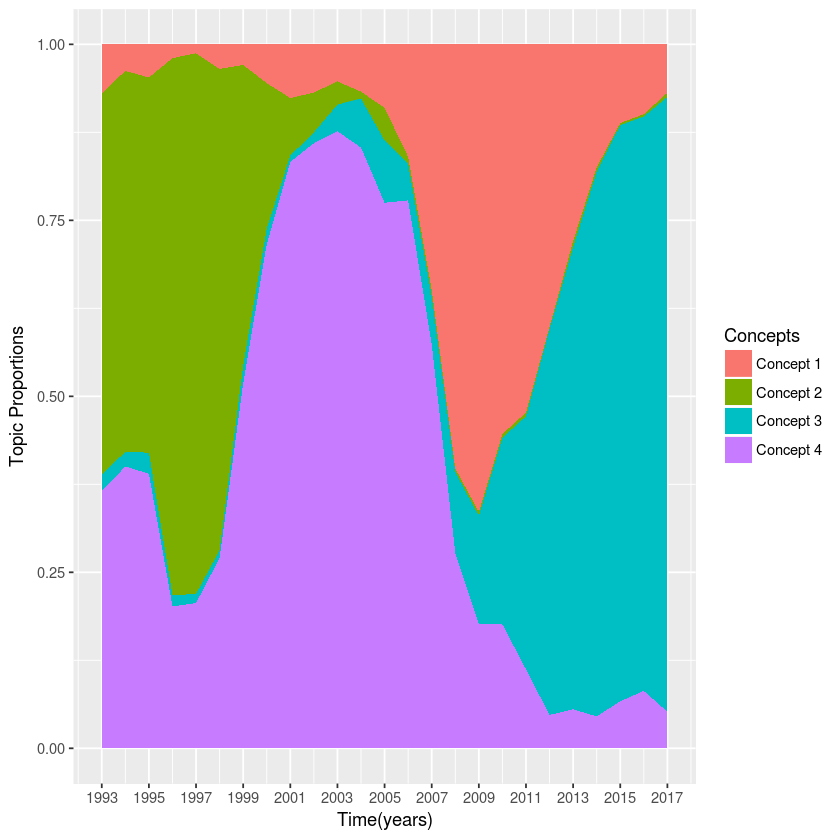

In [26]:
ii <- 1993:2017

TimeByDocs <- as.numeric(rep(1993:2017,each=k))

plot <- ggplot(chartdata, aes(x=TimeByDocs,y=vector,fill=Concepts)) + geom_area()+ scale_x_continuous(breaks=seq(1993,2017, 2)) +
  xlab("Time(years)") +
  ylab("Topic Proportions")
png("k4_lda.png")
plot 
dev.off()
plot 

# Top terms in Each Topics:

In [27]:
ldaGibbs_k.terms <- as.matrix(terms(ldaGibbs_k,10))
ldaGibbs_k.terms
write.csv(ldaGibbs_k.terms,file=paste("/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/ldaterms.csv"))


Topic 1,Topic 2,Topic 3,Topic 4
inflat,growth,inflat,price
econom,rang,project,growth
project,price,econom,increas
price,period,percent,econom
financi,increas,polici,inflat
bank,polici,fund,quarter
credit,quarter,expect,spend
remain,direct,price,polici
increas,econom,labor,busi
market,expans,rang,consum


In [28]:
ldaGibbs_k@gamma[1:10,]

0.06946931,0.54193430,0.023244182,0.3653522
0.03772608,0.54110373,0.020837873,0.4003323
0.04713480,0.53288302,0.029963381,0.3900188
0.01959435,0.76298313,0.015884887,0.2015376
0.01268570,0.76801981,0.012930244,0.2063642
0.03503788,0.68368506,0.011066017,0.2702110
0.02923992,0.42691348,0.025574972,0.5182716
0.05516971,0.20657688,0.022134316,0.7161191
0.07630167,0.08172528,0.009163051,0.8328100
0.06848201,0.05657492,0.015388119,0.8595549


# STEP 5: Speech Similarity to the Minutes using LSA

## Visualization

### Correlation of policy makers speeches among each other

In [29]:
#2017 speeches
folder_minutes <- "/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/pdftotext_2017speech/"
  
  #build other dtm
  speech_dtm <- textmatrix(mydir = folder_minutes)

##fold in
#   lsa_folded <- fold_in(speech_dtm,myLSAspace)

In [30]:
# similarity among speakers with their speech alone
corr_speech <- cosine(speech_dtm)
corr_speech

,brainard.txt,dudley.txt,evans.txt,fischer.txt,harker.txt,kaplan.txt,Kashkari.txt,powell.txt,yellen.txt
brainard.txt,1.0000000,0.8368234,0.8717689,0.8669831,0.8340056,0.8956415,0.8712206,0.8850851,0.9050236
dudley.txt,0.8368234,1.0000000,0.9118046,0.8701370,0.9109282,0.9025102,0.8446308,0.9283501,0.8920631
evans.txt,0.8717689,0.9118046,1.0000000,0.8673430,0.9024021,0.9167551,0.8584329,0.9128845,0.9484075
fischer.txt,0.8669831,0.8701370,0.8673430,1.0000000,0.8410444,0.8789352,0.8266819,0.9053595,0.9025148
harker.txt,0.8340056,0.9109282,0.9024021,0.8410444,1.0000000,0.8891968,0.8538037,0.8737240,0.8613011
kaplan.txt,0.8956415,0.9025102,0.9167551,0.8789352,0.8891968,1.0000000,0.8658617,0.8993004,0.9166206
Kashkari.txt,0.8712206,0.8446308,0.8584329,0.8266819,0.8538037,0.8658617,1.0000000,0.8459150,0.8505523
powell.txt,0.8850851,0.9283501,0.9128845,0.9053595,0.8737240,0.8993004,0.8459150,1.0000000,0.9395521
yellen.txt,0.9050236,0.8920631,0.9484075,0.9025148,0.8613011,0.9166206,0.8505523,0.9395521,1.0000000


### Speeches of Yellen and Evans are more correlated(same mindset)

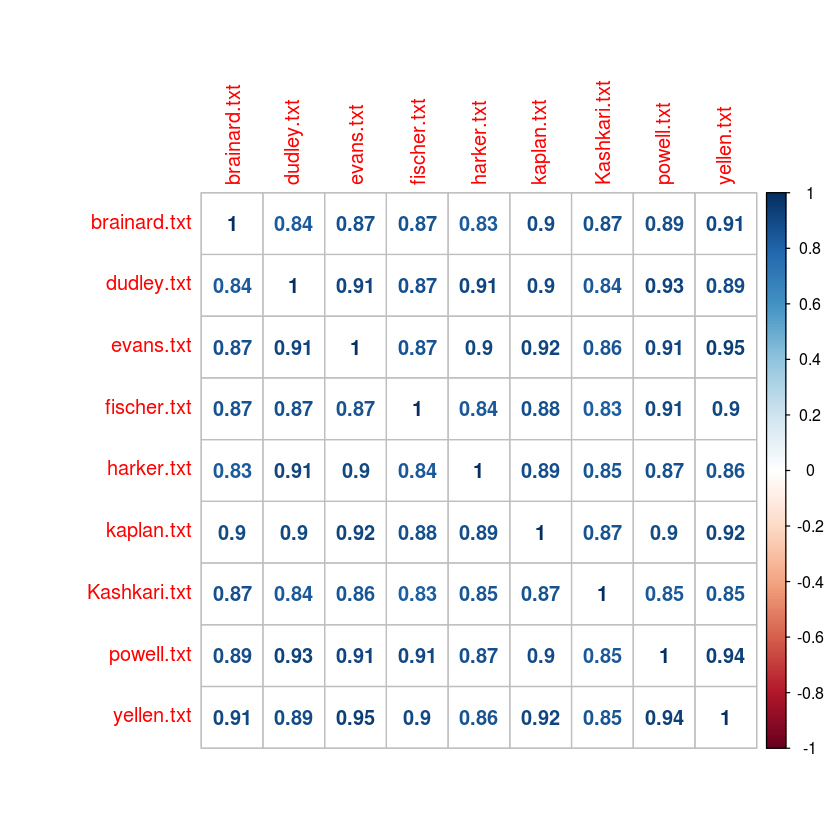

In [31]:
# corrplot(corr_2017, type = "upper", order = "hclust", 
#          tl.col = "black", tl.srt = 45)
# png("corr_2017.png")
corrplot(corr_speech, method = "number")
# dev.off()

### Similarity of Minutes on the Speeches Latent space:* for year 2016*
https://www.rdocumentation.org/packages/lsa/versions/0.73.1/topics/lsa

In [32]:
# Folding in minutes
##-----------------------lets do another set of speeches and minutes from 2016 first
folder_sp <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/speeches_text_2016/"

folder_minutes <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/minutes_2016/"

In [33]:
text_dtm <- textmatrix(mydir = folder_sp, stemming = TRUE, language = "english", minWordLength = 4,
                       minDocFreq = 2, stopwords = words_to_remove_in_article, removeNumbers = TRUE)

##try df-ift for weighting scheme
text_tfidf <- lw_logtf(text_dtm) * gw_idf(text_dtm)

##dimcalc_share is a method to find best number of concepts; use this or do another analysis?
text_lsa_decomp <- lsa(text_tfidf, dims = dimcalc_share()) 

##check number of concepts
dim(text_lsa_decomp$tk)


#build other dtm
minutes_dtm <- textmatrix(mydir = folder_minutes, vocabulary = rownames(text_dtm))

##apply global weighting to minutes_dtm
minutes_weighted <- gw_idf(text_dtm) * lw_logtf(minutes_dtm)

##fold in
lsa_folded <- fold_in(minutes_weighted,text_lsa_decomp)


[1] 1482    4

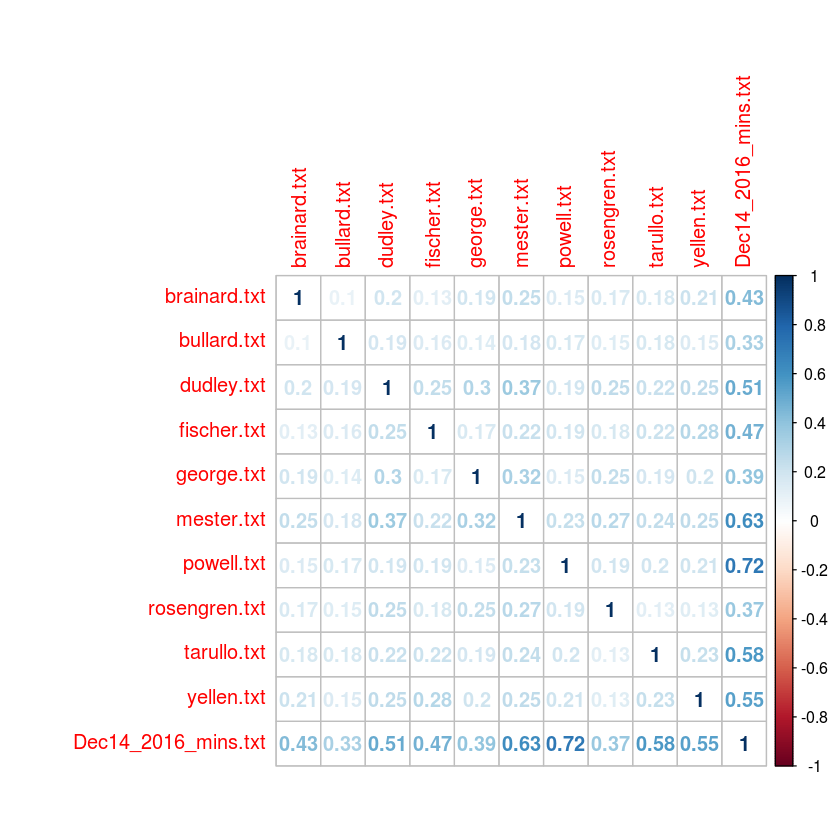

In [34]:
sim_matrix <- cbind(text_tfidf,lsa_folded)

corr <- cosine(sim_matrix)

# png("final_corplot_2016.png")
corrplot(corr, method = "number")
# dev.off()

### Similarity of Minutes on the Speeches Latent space:*for year 2017*

In [35]:
##----------------now let's do the most recent minutes 
folder_sp <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/speeches_text/"
# folder_sp <- "C:/Users/DJDwork/Documents/speeches_text"

folder_minutes <-"/home/harish/PycharmProjects/Topic-Modeling/Data Extraction/dataset/last_minutes/"
# folder_minutes <- "C:/Users/DJDwork/Documents/last_minutes"


In [36]:

text_dtm <- textmatrix(mydir = folder_sp, stemming = TRUE, language = "english", minWordLength = 4,
                       minDocFreq = 2, stopwords = words_to_remove_in_article, removeNumbers = TRUE)

##try df-ift for weighting scheme
text_tfidf <- lw_logtf(text_dtm) * gw_idf(text_dtm)

##dimcalc_share is a method to find best number of concepts; use this or do another analysis?
text_lsa_decomp <- lsa(text_tfidf, dims = dimcalc_share()) 

##check number of concepts
dim(text_lsa_decomp$tk)



#build other dtm
minutes_dtm <- textmatrix(mydir = folder_minutes, vocabulary = rownames(text_dtm))

##apply global weighting to minutes_dtm
minutes_weighted <- gw_idf(text_dtm) * lw_logtf(minutes_dtm)

##fold in
lsa_folded <- fold_in(minutes_weighted,text_lsa_decomp)



[1] 1209    4

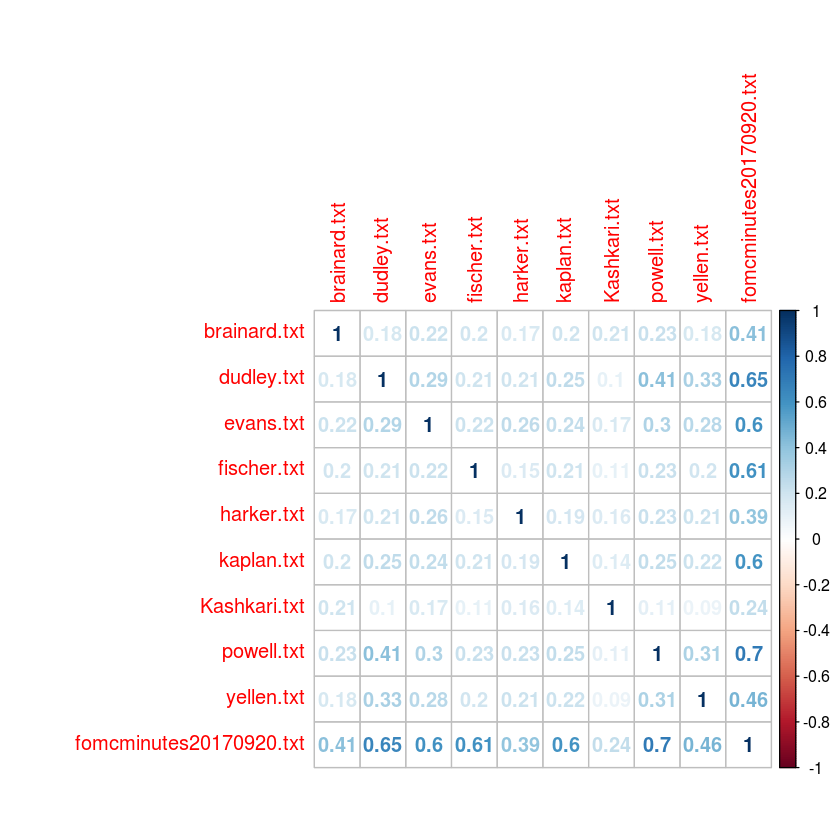

In [37]:


sim_matrix <- cbind(text_tfidf,lsa_folded)

corr <- cosine(sim_matrix)

# png("final_corplot_2017.png")
corrplot(corr, method = "number")
# dev.off()


## Attempt to chart documents in space by concepts

[1] 1 4

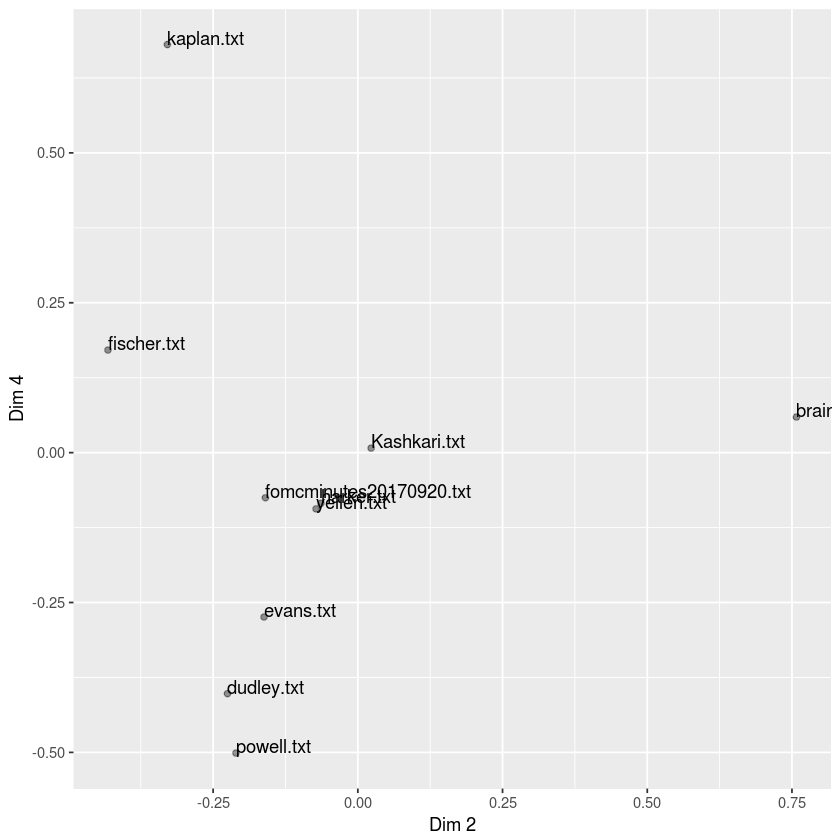

In [38]:

d <- t(minutes_weighted) %*% text_lsa_decomp$tk %*% ginv(diag(text_lsa_decomp$sk))
dim(d)

##rbind d to dk matrix
full_dk <- rbind(text_lsa_decomp$dk,d)
full_df <- data.frame(x = full_dk[,2], y = full_dk[,4])
rownames(full_df) <- rownames(full_dk)

##plot along 2 dimensions
# png("2d space plot.png")
ggplot(full_df, aes(x=x, y = y)) +geom_point(alpha=0.4)+xlab('Dim 2')+ylab('Dim 4')+geom_text(aes(label=rownames(full_df)),hjust=0,vjust=0)
# dev.off()

The ​ ​key ​ ​Inference ​ ​from ​ ​LSA:
1. The ​ ​created ​ ​LSA ​ ​for ​ ​the ​ ​speeches ​ ​in ​ ​the ​ ​time ​ ​frame ​ ​of ​ ​2016, ​ ​the ​ ​speeches ​ ​of ​ ​Mr. ​ ​Powell ​ ​and ​ ​Mr. ​ ​Mester ​ ​contributes ​ ​more
to ​ ​the ​ ​minute’s ​ ​data.
2. Considering ​ ​the ​ ​corrplot ​ ​above, ​ ​both ​ ​Mr.Powell ​ ​and ​ ​Mr.Mester ​ ​speeches ​ ​are ​ ​more ​ ​correlated ​ ​than ​ ​with ​ ​other
speakers. ​ ​Thus ​ ​it ​ ​is ​ ​sufficient ​ ​enough ​ ​to ​ ​infer ​ ​where ​ ​the ​ ​minute’s ​ ​decision ​ ​is ​ ​going ​ ​to ​ ​be ​ ​based ​ ​on ​ ​either ​ ​one ​ ​of ​ ​their
speeches.